# EDA & visualizations

## Imports

In [1]:
import chart_studio.plotly as py
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.offline import iplot, init_notebook_mode
# Using plotly + cufflinks in offline mode
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)
import requests 
import pickle
import random
import json
import os
import decimal
import hmac
import time
import itertools
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
import mplfinance as mpf
import mpl_finance
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates
import numpy as np
style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

In [2]:
ls

 Volume in drive C is OS
 Volume Serial Number is D816-28B0

 Directory of C:\Users\luigi\FlatironSchool\Module06\Project\dsc-capstone-project-v2-online-ds-pt-051319

12/03/2020  17:51    <DIR>          .
12/03/2020  17:51    <DIR>          ..
21/02/2020  12:53                29 .gitignore
12/03/2020  17:47    <DIR>          .ipynb_checkpoints
21/02/2020  12:53                92 .learn
12/03/2020  12:25        13,148,480 500crypto_joined_close.csv
02/03/2020  13:13         5,037,521 500crypto_joined_close_volume.csv
25/02/2020  12:44           256,075 5crypto_joined_close_volume.csv
21/02/2020  12:53           159,043 btc_df.csv
21/02/2020  12:53            78,914 capstone_project_rubric.pdf
21/02/2020  12:53             1,849 CONTRIBUTING.md
21/02/2020  12:53    <DIR>          crypto_data
21/02/2020  12:53    <DIR>          crypto_dfs
12/03/2020  12:25             7,538 crypto_tickers.pickle
11/03/2020  19:53        15,544,481 Cryptocurrencies_pred.ipynb
21/02/2020  12:53             

## Get trading data for BTCUSD

Request from Binance API symbol's with hourly interval and create a df.
Increasing the range gives us further data in the past.

In [3]:
df_btcusd = pd.DataFrame()

for x in range(5):
    
    if x == 0: 
    
        response = requests.get('https://api.binance.com/api/v1/klines?symbol=BTCUSDT&interval=1h')
        data_symbol = json.loads(response.text)

        # put in dataframe and drop columns we don't neeed
        df = pd.DataFrame.from_dict(data_symbol)
        df = df.drop(range(6, 12), axis=1)

        # rename columns
        col_names = ['Time', 'Open', 'High', 'Low', 'Close', 'Volume']
        df.columns = col_names

        # transform values from strings to floats
        for col in col_names[1:6]:
            df[col] = df[col].astype(float)
            
        df = df.sort_values(by='Time', ascending=False, kind='quicksort')
            
        df_btcusd = df_btcusd.append(df)
        
        timestamp = int(df.loc[0, 'Time'])
            
    else:
        
        response = requests.get(f'https://api.binance.com/api/v1/klines?symbol=BTCUSDT&interval=1h&endTime={timestamp}')
        data_symbol = json.loads(response.text)
        
        # put in dataframe and drop columns we don't neeed
        df1 = pd.DataFrame.from_dict(data_symbol)
        df1 = df1.drop(range(6, 12), axis=1)
        
                # rename columns
        col_names = ['Time', 'Open', 'High', 'Low', 'Close', 'Volume']
        df1.columns = col_names
        
        # transform values from strings to floats
        for col in col_names[1:6]:
            df1[col] = df1[col].astype(float)
            
        df1.drop(499, inplace=True)
        
        df1 = df1.sort_values(by='Time', ascending=False, kind='quicksort')
        
        df_btcusd = df_btcusd.append(df1)
        
        df_btcusd.reset_index(drop = True, inplace = True)
        
        #df_crypto['Date'] = pd.to_datetime(df1['Time'], unit='ms')
        
        timestamp = int(df1.loc[0, 'Time'])
        
df_btcusd['Date'] = pd.to_datetime(df_btcusd['Time'], unit='ms')

## Plot candlestick using Plotly

In [4]:
candle = go.Candlestick(
            x = df_btcusd['Date'],
            open = df_btcusd['Open'],
            close = df_btcusd['Close'],
            high = df_btcusd['High'],
            low = df_btcusd['Low'],
            name = "Candlesticks")

fig = go.Figure(data=[candle])

fig.show()

In [5]:
df_btcusd.duplicated().any()

False

In [6]:
df_btcusd.drop(columns='Time', axis=1, inplace=True)

In [7]:
df_btcusd = df_btcusd.set_index('Date')

In [8]:
df_btcusd = df_btcusd.sort_index()

In [9]:
df_btcusd.head()

,Open,High,Low,Close,Volume
Date,,,,,
2019-11-29 11:00:00,7535.16,7561.00,7495.0,7514.24,2692.659199
2019-11-29 12:00:00,7514.23,7619.90,7413.0,7594.95,6947.495755
2019-11-29 13:00:00,7594.94,7777.72,7562.0,7743.03,7654.593030
2019-11-29 14:00:00,7743.05,7790.00,7705.1,7749.11,4716.441462
2019-11-29 15:00:00,7749.11,7830.00,7725.0,7807.99,4983.904354


## Plot BTCUSD using interactive Plotly 

In [10]:
df_btcusd['Close'].iplot(mode='lines+text',
                        xTitle='Time',
                        yTitle='Price', 
                        title='Hourly BTCUSD Close',
                        opacity=0.8)

## Plot BTCUSD & moving avg using Matplotlib

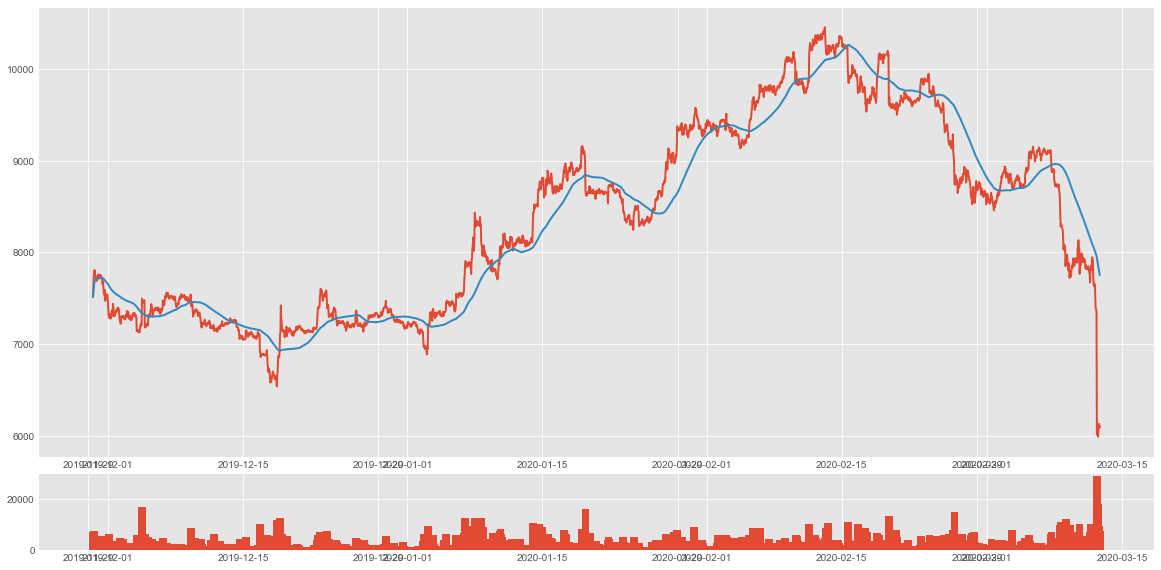

In [11]:
plt.figure(figsize=(20,10))
# Moving Average 100
df_btcusd['100MA'] = df_btcusd['Close'].rolling(window=100, min_periods=0).mean()

ax1 = plt.subplot2grid((6, 1), (0, 0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6, 1), (5, 0), rowspan=1, colspan=1, sharex=ax1)

ax1.plot(df_btcusd.index, df_btcusd['Close'], df_btcusd['100MA'])
ax2.bar(df_btcusd.index, df_btcusd['Volume'])

plt.show()

Resample close and volume colums by 1 day.

In [12]:
df_ohlc = df_btcusd['Close'].resample('1d').ohlc()
df_volume = df_btcusd['Volume'].resample('1d').sum()
df_ohlc.head()

,open,high,low,close
Date,,,,
2019-11-29,7514.24,7807.99,7514.24,7739.68
2019-11-30,7760.31,7760.31,7475.02,7541.89
2019-12-01,7480.61,7480.61,7277.44,7390.89
2019-12-02,7367.44,7398.56,7224.16,7294.28
2019-12-03,7363.50,7363.50,7262.24,7292.71


Change date to matplotlib timestamp to plot ohlc candlestick.

In [13]:
df_ohlc.index = df_ohlc.index.map(mdates.date2num)
df_ohlc.head()

,open,high,low,close
737392.0,7514.24,7807.99,7514.24,7739.68
737393.0,7760.31,7760.31,7475.02,7541.89
737394.0,7480.61,7480.61,7277.44,7390.89
737395.0,7367.44,7398.56,7224.16,7294.28
737396.0,7363.50,7363.50,7262.24,7292.71


In [14]:
df_ohlc.reset_index(inplace=True)
df_ohlc.head()

,index,open,high,low,close
0,737392.0,7514.24,7807.99,7514.24,7739.68
1,737393.0,7760.31,7760.31,7475.02,7541.89
2,737394.0,7480.61,7480.61,7277.44,7390.89
3,737395.0,7367.44,7398.56,7224.16,7294.28
4,737396.0,7363.50,7363.50,7262.24,7292.71


In [15]:
df_ohlc.columns = [['Date', 'Open', 'High', 'Low', 'Close']]
df_ohlc.head()

,Date,Open,High,Low,Close
0,737392.0,7514.24,7807.99,7514.24,7739.68
1,737393.0,7760.31,7760.31,7475.02,7541.89
2,737394.0,7480.61,7480.61,7277.44,7390.89
3,737395.0,7367.44,7398.56,7224.16,7294.28
4,737396.0,7363.50,7363.50,7262.24,7292.71


## Plot candlestick using Matplotlib

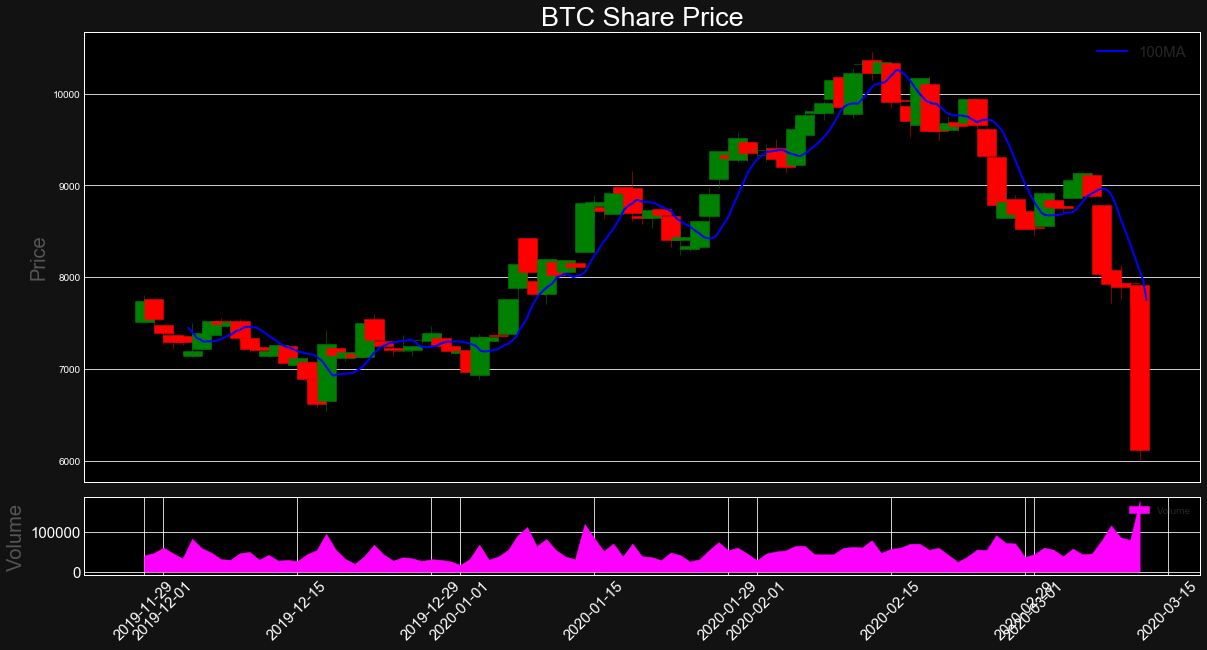

In [16]:
plt.figure(figsize=(20,10))
ax1 = plt.subplot2grid((6, 1), (0, 0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6, 1), (5, 0), rowspan=1, colspan=1, sharex=ax1)



candlestick_ohlc(ax1, df_ohlc.values, width=2, colorup='g', colordown='r')
ax1.grid(True)
ax1.set_axisbelow(True)
ax1.set_title('BTC Share Price', color='white', fontsize=27)
ax1.set_facecolor('black')
ax1.figure.set_facecolor('#121212')
ax1.tick_params(axis='x', colors='white')
ax1.tick_params(axis='y', colors='white')
ax1.axes.get_xaxis().set_visible(False)
ax1.set_ylabel('Price', fontsize = 20) 

ax1.plot(df_btcusd['Close'].rolling(window=100).mean(), color='b',  label='100MA')
ax1.legend(loc="upper right", fontsize=15)

plt.xticks(rotation=45,fontsize=15)
plt.yticks(fontsize=15)
ax1.xaxis_date()


ax2.fill_between(df_volume.index.map(mdates.date2num), df_volume.values, 0, color = 'magenta',  label='Volume')
ax2.set_ylabel('Volume', fontsize = 20) 
ax2.tick_params(axis='x', colors='white')
ax2.tick_params(axis='y', colors='white')
ax2.grid(True)
ax2.set_facecolor('black')
ax2.legend(loc="upper right", fontsize=15)
plt.legend()
plt.show()


# Get All Trading (currently) Symbols

In [17]:
def get_trading_symbols():
    '''
     Get trading symbols from Binance API

     Returns: 
         symbols: symbols actively traded in Binance
    '''
    
    response = requests.get('https://api.binance.com' + '/api/v1/exchangeInfo')
    data_symbols = json.loads(response.text)
    
    symbols = []

    for x in data_symbols['symbols']:
        if x['status'] == 'TRADING':
            symbols.append(x['symbol'])
            
    return symbols

In [18]:
symbols = get_trading_symbols()

In [19]:
symbols

['ETHBTC',
 'LTCBTC',
 'BNBBTC',
 'NEOBTC',
 'QTUMETH',
 'EOSETH',
 'SNTETH',
 'BNTETH',
 'GASBTC',
 'BNBETH',
 'BTCUSDT',
 'ETHUSDT',
 'OAXETH',
 'DNTETH',
 'MCOETH',
 'MCOBTC',
 'WTCBTC',
 'WTCETH',
 'LRCBTC',
 'LRCETH',
 'QTUMBTC',
 'YOYOBTC',
 'OMGBTC',
 'OMGETH',
 'ZRXBTC',
 'ZRXETH',
 'STRATBTC',
 'STRATETH',
 'SNGLSBTC',
 'BQXBTC',
 'BQXETH',
 'KNCBTC',
 'KNCETH',
 'FUNBTC',
 'FUNETH',
 'SNMBTC',
 'NEOETH',
 'IOTABTC',
 'IOTAETH',
 'LINKBTC',
 'LINKETH',
 'XVGBTC',
 'XVGETH',
 'MDABTC',
 'MDAETH',
 'MTLBTC',
 'MTLETH',
 'EOSBTC',
 'SNTBTC',
 'ETCETH',
 'ETCBTC',
 'MTHBTC',
 'MTHETH',
 'ENGBTC',
 'ENGETH',
 'DNTBTC',
 'ZECBTC',
 'ZECETH',
 'BNTBTC',
 'ASTBTC',
 'ASTETH',
 'DASHBTC',
 'DASHETH',
 'OAXBTC',
 'BTGBTC',
 'EVXBTC',
 'EVXETH',
 'REQBTC',
 'REQETH',
 'VIBBTC',
 'VIBETH',
 'TRXBTC',
 'TRXETH',
 'POWRBTC',
 'POWRETH',
 'ARKBTC',
 'ARKETH',
 'XRPBTC',
 'XRPETH',
 'ENJBTC',
 'ENJETH',
 'STORJBTC',
 'STORJETH',
 'BNBUSDT',
 'POWRBNB',
 'KMDBTC',
 'KMDETH',
 'NULSBNB',
 'RCNB

# Get Data for all the Symbols

Use 500 symbols.

In [20]:
symbols = symbols[:500]

Create pickle object so that later we can reference it.

In [21]:
with open('crypto_tickers.pickle', 'wb') as f:
    pickle.dump(symbols, f)

In [22]:
def get_data_from_binance(reload_symbols=False):
    '''
     Get data for each cryptocurrency, increasing range gives us further data in the past
     
     Args: 
         reload_symbols: check if path with symbols already exists, if not it calls function to get symbols
    '''
    
    if reload_symbols:
        symbols = get_trading_symbols()
    else:
        with open('crypto_tickers.pickle', 'rb') as f:
            symbols = pickle.load(f)
            
    if not os.path.exists('crypto_dfs'):
        os.makedirs('crypto_dfs')
        
    for symbol in symbols:
        
        print(symbol)
        
        if not os.path.exists('crypto_dfs/{}.csv'.format(symbol)):
            
            
            df_crypto = pd.DataFrame()

            for x in range(5):

                if x == 0: 

                    response = requests.get(f'https://api.binance.com/api/v1/klines?symbol={symbol}&interval=1h')
                    data_symbol = json.loads(response.text)

                    # put in dataframe and drop columns we don't neeed
                    df = pd.DataFrame.from_dict(data_symbol)
                    df = df.drop(range(6, 12), axis=1)

                    # rename columns
                    col_names = ['Time', 'Open', 'High', 'Low', 'Close', 'Volume']
                    df.columns = col_names

                    # transform values from strings to floats
                    for col in col_names[1:6]:
                        df[col] = df[col].astype(float)

                    df = df.sort_values(by='Time', ascending=False, kind='quicksort')

                    df_crypto = df_crypto.append(df)

                    timestamp = int(df.loc[0, 'Time'])

                else:

                    response = requests.get(f'https://api.binance.com/api/v1/klines?symbol={symbol}&interval=1h&endTime={timestamp}')
                    data_symbol = json.loads(response.text)

                    # put in dataframe and drop columns we don't neeed
                    df1 = pd.DataFrame.from_dict(data_symbol)
                    df1 = df1.drop(range(6, 12), axis=1)

                            # rename columns
                    col_names = ['Time', 'Open', 'High', 'Low', 'Close', 'Volume']
                    df1.columns = col_names

                    # transform values from strings to floats
                    for col in col_names[1:6]:
                        df1[col] = df1[col].astype(float)

                    df1.drop(df.tail(1).index,inplace=True)

                    df1 = df1.sort_values(by='Time', ascending=False, kind='quicksort')

                    df_crypto = df_crypto.append(df1)

                    df_crypto.reset_index(drop = True, inplace = True)

                    timestamp = int(df1.loc[0, 'Time'])
                    

            df_crypto['Date'] = pd.to_datetime(df_crypto['Time'], unit='ms')
            
            df_crypto.to_csv('crypto_dfs/{}.csv'.format(symbol))
            
        else:
            print('Already have {}'.format(symbol))

In [23]:
get_data_from_binance()

ETHBTC
Already have ETHBTC
LTCBTC
Already have LTCBTC
BNBBTC
Already have BNBBTC
NEOBTC
Already have NEOBTC
QTUMETH
Already have QTUMETH
EOSETH
Already have EOSETH
SNTETH
Already have SNTETH
BNTETH
Already have BNTETH
GASBTC
Already have GASBTC
BNBETH
Already have BNBETH
BTCUSDT
Already have BTCUSDT
ETHUSDT
Already have ETHUSDT
OAXETH
Already have OAXETH
DNTETH
Already have DNTETH
MCOETH
Already have MCOETH
MCOBTC
Already have MCOBTC
WTCBTC
Already have WTCBTC
WTCETH
Already have WTCETH
LRCBTC
Already have LRCBTC
LRCETH
Already have LRCETH
QTUMBTC
Already have QTUMBTC
YOYOBTC
Already have YOYOBTC
OMGBTC
Already have OMGBTC
OMGETH
Already have OMGETH
ZRXBTC
Already have ZRXBTC
ZRXETH
Already have ZRXETH
STRATBTC
Already have STRATBTC
STRATETH
Already have STRATETH
SNGLSBTC
Already have SNGLSBTC
BQXBTC
Already have BQXBTC
BQXETH
Already have BQXETH
KNCBTC
Already have KNCBTC
KNCETH
Already have KNCETH
FUNBTC
Already have FUNBTC
FUNETH
Already have FUNETH
SNMBTC
Already have SNMBTC
NEOETH

Already have LTCUSDC
TRXPAX
Already have TRXPAX
TRXUSDC
Already have TRXUSDC
BTTBNB
Already have BTTBNB
BTTUSDT
Already have BTTUSDT
USDSUSDT
Already have USDSUSDT
BTTPAX
Already have BTTPAX
BTTTUSD
Already have BTTTUSD
BTTUSDC
Already have BTTUSDC
ONGBNB
Already have ONGBNB
ONGBTC
Already have ONGBTC
ONGUSDT
Already have ONGUSDT
HOTBNB
Already have HOTBNB
HOTUSDT
Already have HOTUSDT
ZILUSDT
Already have ZILUSDT
ZRXBNB
Already have ZRXBNB
ZRXUSDT
Already have ZRXUSDT
FETBNB
Already have FETBNB
FETBTC
Already have FETBTC
FETUSDT
Already have FETUSDT
BATUSDT
Already have BATUSDT
XMRBNB
Already have XMRBNB
XMRUSDT
Already have XMRUSDT
ZECBNB
Already have ZECBNB
ZECUSDT
Already have ZECUSDT
ZECTUSD
Already have ZECTUSD
ZECUSDC
Already have ZECUSDC
IOSTBNB
Already have IOSTBNB
IOSTUSDT
Already have IOSTUSDT
CELRBNB
Already have CELRBNB
CELRBTC
Already have CELRBTC
CELRUSDT
Already have CELRUSDT
ADAPAX
Already have ADAPAX
ADAUSDC
Already have ADAUSDC
NEOPAX
Already have NEOPAX
NEOUSDC
Alrea

In [24]:
def compile_data():
    '''
     Create main_df containing close column for each symbol 

     Returns: 
         main_df: main_df contaning close column for each cryptocurrency
    '''
    with open('crypto_tickers.pickle', 'rb') as f:
        symbols = pickle.load(f)
    
    main_df = pd.DataFrame()
    
    for count, symbol in enumerate(symbols):
        df =pd.read_csv(f'crypto_dfs/{symbol}.csv',  index_col=0)
        df.set_index('Date', inplace=True)
        
        df.rename(columns={'Close' : symbol}, inplace=True)
        df.drop(['Time','Open','High','Low','Volume'], 1, inplace=True)
        
        if main_df.empty:
            main_df = df
            
        else:
            main_df = main_df.join(df)
            
    print(main_df.head())    
        
    main_df.to_csv('500crypto_joined_close.csv')
    
    return main_df

In [25]:
main_df = compile_data()

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
                       ETHBTC    LTCBTC    BNBBTC    NEOBTC   QTUMETH  \
Date                                                                    
2020-02-10 15:00:00  0.022652  0.007563  0.002530  0.001364  0.011631   
2020-02-10 14:00:00  0.022596  0.007530  0.002514  0.001364  0.011596   
2020-02-10 13:00:00  0.022359  0.007480  0.002537  0.001362  0.011615   
2020-02-10 12:00:00  0.022343  0.007504  0.002514  0.001359  0.011685   
2020-02-10 11:00:00  0.022256  0.007457  0.002490  0.001357  0.011656   

                       EOSETH    SNTETH    BNTETH    GASBTC    BNBETH   ...    \
Date                                                                    ...     
2020-02-10 15:00:00  0.021880  0.000074  0.001383  0.000158  0.111699   ...     
2020-02-10 14:00:00  0.022017  0.000074  0.001380  0.000

In [26]:
main_df.head()

,ETHBTC,LTCBTC,BNBBTC,NEOBTC,QTUMETH,EOSETH,SNTETH,BNTETH,GASBTC,BNBETH,...,BUSDUSDT,BEAMBNB,BEAMBTC,BEAMUSDT,XTZBNB,XTZBTC,XTZUSDT,RENUSDT,RVNUSDT,HCUSDT
Date,,,,,,,,,,,,,,,,,,,,,
2020-02-10 15:00:00,0.022652,0.007563,0.002530,0.001364,0.011631,0.021880,0.000074,0.001383,0.000158,0.111699,...,1.0003,0.03439,0.000088,0.8690,0.10589,0.000270,2.6708,0.05642,0.03316,2.2425
2020-02-10 14:00:00,0.022596,0.007530,0.002514,0.001364,0.011596,0.022017,0.000074,0.001380,0.000159,0.111391,...,1.0002,0.03448,0.000087,0.8595,0.10857,0.000273,2.7000,0.05551,0.03280,2.2317
2020-02-10 13:00:00,0.022359,0.007480,0.002537,0.001362,0.011615,0.022002,0.000075,0.001388,0.000156,0.113481,...,1.0002,0.03420,0.000087,0.8523,0.10793,0.000273,2.6935,0.05581,0.03250,2.1902
2020-02-10 12:00:00,0.022343,0.007504,0.002514,0.001359,0.011685,0.021915,0.000075,0.001390,0.000155,0.112483,...,1.0007,0.03440,0.000087,0.8560,0.10849,0.000272,2.6806,0.05615,0.03251,2.1661
2020-02-10 11:00:00,0.022256,0.007457,0.002490,0.001357,0.011656,0.021900,0.000075,0.001391,0.000157,0.111846,...,1.0010,0.03380,0.000084,0.8279,0.10523,0.000263,2.5779,0.05581,0.03239,2.1356


In [27]:
main_df.duplicated().any()

False

# Find Relationship with different Cryptocurrencies

Check correlation between all cryptocurrency.

In [28]:
df = pd.read_csv('500crypto_joined_close.csv')
corrs = df.corr()
corrs

,ETHBTC,LTCBTC,BNBBTC,NEOBTC,QTUMETH,EOSETH,SNTETH,BNTETH,GASBTC,BNBETH,...,BUSDUSDT,BEAMBNB,BEAMBTC,BEAMUSDT,XTZBNB,XTZBTC,XTZUSDT,RENUSDT,RVNUSDT,HCUSDT
ETHBTC,1.000000,0.762170,0.890767,0.595853,-0.589773,-0.292213,0.235963,-0.166582,0.721040,0.071187,...,-0.134941,-0.483195,0.333589,0.533807,-0.380084,-0.105651,0.141925,0.701968,0.549873,0.689952
LTCBTC,0.762170,1.000000,0.606105,0.563975,-0.505293,0.317209,-0.080090,-0.618201,0.405624,-0.105524,...,0.090962,-0.304024,0.266881,0.786468,-0.315971,-0.127990,0.333392,0.789720,0.681237,0.836356
BNBBTC,0.890767,0.606105,1.000000,0.580645,-0.527549,-0.408803,0.206692,0.003832,0.853785,0.516075,...,-0.144845,-0.616245,0.273330,0.473469,-0.643048,-0.391707,-0.181641,0.746725,0.476668,0.683596
NEOBTC,0.595853,0.563975,0.580645,1.000000,-0.367825,0.019106,-0.132009,-0.272187,0.331667,0.141026,...,0.303527,-0.206264,0.349378,0.394966,-0.205095,-0.030672,0.139786,0.510967,0.138208,0.376345
QTUMETH,-0.589773,-0.505293,-0.527549,-0.367825,1.000000,0.096518,0.255638,0.372524,-0.284344,-0.047772,...,0.098184,0.720815,0.326306,-0.073020,0.477764,0.335335,0.141746,-0.485043,-0.270315,-0.347893
EOSETH,-0.292213,0.317209,-0.408803,0.019106,0.096518,1.000000,-0.545290,-0.748122,-0.574870,-0.345594,...,0.437870,0.284179,-0.051652,0.367801,0.259348,0.180331,0.494490,0.039063,0.250830,0.182156
SNTETH,0.235963,-0.080090,0.206692,-0.132009,0.255638,-0.545290,1.000000,0.577265,0.453123,0.015692,...,-0.413590,0.131990,0.352396,0.074904,0.053594,0.119917,0.015592,0.012464,0.123528,0.092869
BNTETH,-0.166582,-0.618201,0.003832,-0.272187,0.372524,-0.748122,0.577265,1.000000,0.268464,0.325522,...,-0.229985,0.125507,0.127571,-0.446070,-0.015285,-0.054419,-0.445968,-0.373587,-0.420651,-0.417554
GASBTC,0.721040,0.405624,0.853785,0.331667,-0.284344,-0.574870,0.453123,0.268464,1.000000,0.518300,...,-0.277776,-0.495407,0.254348,0.394760,-0.672819,-0.505008,-0.367449,0.658089,0.411878,0.608437
BNBETH,0.071187,-0.105524,0.516075,0.141026,-0.047772,-0.345594,0.015692,0.325522,0.518300,1.000000,...,-0.070277,-0.451912,-0.040848,0.033023,-0.700710,-0.666452,-0.667352,0.321255,0.023784,0.209237


In [29]:
corrs.index

Index(['ETHBTC', 'LTCBTC', 'BNBBTC', 'NEOBTC', 'QTUMETH', 'EOSETH', 'SNTETH',
       'BNTETH', 'GASBTC', 'BNBETH',
       ...
       'BUSDUSDT', 'BEAMBNB', 'BEAMBTC', 'BEAMUSDT', 'XTZBNB', 'XTZBTC',
       'XTZUSDT', 'RENUSDT', 'RVNUSDT', 'HCUSDT'],
      dtype='object', length=500)

In [30]:
def visualize_data():
''' Visualize correlation heatmap 
'''
    df = pd.read_csv('500crypto_joined_close.csv')
    corrs = df.corr()

    fig = go.Figure(data=go.Heatmap(
                    z=corrs.values,
                    x=list(corrs.columns),
                    y=list(corrs.index),
                    showscale=True,
                    colorscale='Inferno',
                    hoverongaps = False))
    fig.show()

IndentationError: expected an indented block (<ipython-input-30-ce833c3a2c78>, line 3)

## Visualize interactive correlation heatmap using Plotly

In [ ]:
visualize_data()